<a href="https://colab.research.google.com/github/ericfruchi/Portfolio/blob/master/Explorando_os_Dados_do_IMDb_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook criado por **Eric Fruchi**
___

# **Explorando os Dados do IMDb - Filmes**

O IMDb (Internet Movie Database), foi fundado em 1990 por Col Needham como um banco de dados online para filmes e programas de televisão. Desde então, cresceu para se tornar uma das maiores e mais influentes plataformas de informações sobre entretenimento. Com milhões de títulos listados e uma vasta base de usuários, o IMDb desempenha um papel crucial na indústria cinematográfica, ajudando os espectadores a descobrir novos filmes, acompanhar avaliações e classificações, e até mesmo influenciar o sucesso de produções por meio de suas listas de popularidade e críticas. Nos dias atuais, é uma referência essencial para cinéfilos, profissionais do ramo e até mesmo para a indústria cinematográfica em si.

<left><img alt="IMDb cover" width="80%" src="https://cdn-images-1.medium.com/max/1200/1*jX5WNmCdKay-vEMhvafbCA.png">
<figcaption></figcaption>
</left>

O dataset que usaremos para nosso projeto foi publicado por Akash Kotal, é possível encontrá-lo através desse link: [IMBD TOP 1000 WITH DESCRIPTION](https://www.kaggle.com/datasets/akashkotal/imbd-top-1000-with-description). Lá é possível encontrar todos os detalhes a respeito do dataset.

*Outra informação importante com relação ao dataset, que apesar do IMDb cobrir vários tipos de produções, este dataset tráz somente dados de **filmes** e é nisso que vamos focar nossa análise.*

**O principal objetivo do projeto é através de uma análise descritiva entender os padrões e comportamento dos filmes mais bem avaliados e responder perguntas que de alguma forma gerarão insights interessantes para curiosos ou entusiastas da cultura cinematográfica.**

Como boa prática, abaixo trago o dicionário de variávies, onde nele informo os detalhes das colunas do dataset.

### Dicionário de Variáveis:

* Movie Name - Nome do filme;
* Year of Release - Ano de lançamento;
* Watch Time - Tempo do filme (em minutos);
* Movie Rating - Nota do filme dada por usuários da plataforma (IMDb). Usuários podem avaliar filmes em uma escala de zero a 10;
* Meatscore of movie - Nota do filme dada por um grupo de críticos da indústria do cinema;
*	Gross - Arrecadação de bilheteria;
* Description - Descrição do filme;
* Year - Ano que a produção lançada*;
* Watch Time in Hours - Tempo do filme (em horas)*;
* Decada - Década que o filme foi lancádo*.

(*coluna criada).

## Importando os Dados

In [6]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Como boa prática em projetos pessoais, gosto de hospedar o dataset em meu Google Drive e através da biblioteca *google.colab.drive*,  monto e o acesso diretamente de um notebook Colab.

In [7]:
# importando biblioteca do google drive
from google.colab import drive

# montar ambiente google drive no google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# ler arquivo via caminho google drive
data = "/content/drive/My Drive/Datasets/IMDB movies/Top 1000 IMDB movie.csv"
df = pd.read_csv(data, index_col="Movie Name") # coluna "movie name" como índice

In [9]:
# ler primeiras entradas
df.head()

,Unnamed: 0,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
Movie Name,,,,,,,,
The Shawshank Redemption,0,(1994),142 min,9.3,81,"34,709",$28.34M,Two imprisoned men bond over a number of years...
The Godfather,1,(1972),175 min,9.2,100,"34,709",$134.97M,The aging patriarch of an organized crime dyna...
The Dark Knight,2,(2008),152 min,9.0,84,"34,709",$534.86M,When the menace known as the Joker wreaks havo...
The Lord of the Rings: The Return of the King,3,(2003),201 min,9.0,94,"34,709",$377.85M,Gandalf and Aragorn lead the World of Men agai...
Schindler's List,4,(1993),195 min,9.0,94,"34,709",$96.90M,"In German-occupied Poland during World War II,..."


In [10]:
# tamanho do DataFrame
df.shape

(1000, 8)

1000 linhas e 9 colunas, são 9 por que o shape não cálcula a coluna de índice, por isso aparece apenas 8.

In [11]:
# informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, The Shawshank Redemption to The Invisible Man
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Year of Release     1000 non-null   object 
 2   Watch Time          1000 non-null   object 
 3   Movie Rating        1000 non-null   float64
 4   Meatscore of movie  1000 non-null   object 
 5   Votes               1000 non-null   object 
 6   Gross               1000 non-null   object 
 7   Description         1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 70.3+ KB


Há muitos erros nos tipos de colunas, `Watch Time` está como string e precisamos dela em números, o mesmo acontece com a coluna `Meatscore of movie` que também está formatostring, isso segue se repetindo com com `Votes` e `Gross`.

O método `.info()` nos informa não só os tipos de nossas variávies, como também se há dados nulos, que não é o nosso caso, mas vamos confirmar isso usando a função `.isna()`.


In [12]:
# verificar se há dados ausentes no DataFrame
df.isna().sum()

,0
Unnamed: 0,0
Year of Release,0
Watch Time,0
Movie Rating,0
Meatscore of movie,0
Votes,0
Gross,0
Description,0


O metódo `.isna()` alidado ao método `.any()` nos ajuda identificar se temos dados ausentes em nosso DataFrame, há também a possibilidade de adicionar o `.sum()`, dessa ele informa a quantidade de dados ausentes quando houver. Aqui identificamos que não há dados ausentes em nosso DataFrame, todas as colunas apresentaram o numero `0` para possíveis dados ausentes. Seguiremos para a etapa de limpeza de dados.

## Preparação dos Dados



Aqui decisões são tomadas, o DataFrame se transforma, cada ação executada aqui determina grande parte do projeto, necessita-se de muito cuidado, cada dado é muito importante para nós, por isso essa etapa é de muita importância. Afina, dados limpos geram análises melhores e resultados ainda mais confiáveis.

Voltando para o que será feito, além das correções necessárias em determinadas colunas, também removeremos colunas que não iremos utilziar.

Vamos remover duas colunas: `Unnamed: 0` e `Votes` são duas colunas que julgamos não agregar ao nosso projeto, assim nem vamos precisar alterar o tipo da coluna `Votes`.

Por fim, iremos corrigir e alterar as colunas `Gross`, `Watch Time` e `Meatscore of movie` e também iremos criar as colunas `Watch Time in Hour` e `Decada`, com elas teremos o tempo das produções em horas e os filmes representador por suas respectivas décadas.

Bastante coisa, hein. Por isso, mãos à obra!

*Observação: Como boa prática de segurança, vamos criar uma cópia do nosso DataFrame para iniciar as ações de limpeza de dados.*

In [13]:
# criar uma cópia do DataFrame
df_clean = df.copy()

In [14]:
# dropar coluna "Unnamed: 0"
df_clean.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
# dropar coluna "Votes"
df_clean.drop("Votes", axis=1, inplace=True)

In [16]:
# removendo os parenteses da coluna 'Year of Release'
df_clean['Year of Release'] = df_clean['Year of Release'].str.extract('(\d+)')

# remover parenteses da string
print(df_clean["Year of Release"])

Movie Name
The Shawshank Redemption                         1994
The Godfather                                    1972
The Dark Knight                                  2008
The Lord of the Rings: The Return of the King    2003
Schindler's List                                 1993
                                                 ... 
Sabrina                                          1954
From Here to Eternity                            1953
Snow White and the Seven Dwarfs                  1937
The 39 Steps                                     1935
The Invisible Man                                1933
Name: Year of Release, Length: 1000, dtype: object


Após extrair os números da coluna **Year of Release** e deixando para trás os parentêses e afins.. Vamos converte-la em formato datetime.

Para isso vamos utilizar a biblioteca *datetime*.

In [17]:
# importando biblioteca datetime
from datetime import date

In [18]:
df_clean['Year of Release'] = pd.to_datetime(df_clean['Year of Release']).dt.year
df_clean['Year of Release']

,Year of Release
Movie Name,
The Shawshank Redemption,1994
The Godfather,1972
The Dark Knight,2008
The Lord of the Rings: The Return of the King,2003
Schindler's List,1993
...,...
Sabrina,1954
From Here to Eternity,1953
Snow White and the Seven Dwarfs,1937


In [19]:
# coluna "Watch Time" (remover o texto min)
df_clean["Watch Time"] = df_clean["Watch Time"].str.extract('(\d+)').astype(int)
print(df_clean["Watch Time"])

Movie Name
The Shawshank Redemption                         142
The Godfather                                    175
The Dark Knight                                  152
The Lord of the Rings: The Return of the King    201
Schindler's List                                 195
                                                ... 
Sabrina                                          113
From Here to Eternity                            118
Snow White and the Seven Dwarfs                   83
The 39 Steps                                      86
The Invisible Man                                 71
Name: Watch Time, Length: 1000, dtype: int64


In [20]:
# criar a coluna Watch Time in Hour
df_clean["Watch Time in Hour"] = round(df_clean["Watch Time"] / 60,1)
print(df_clean["Watch Time in Hour"].head(1))

Movie Name
The Shawshank Redemption    2.4
Name: Watch Time in Hour, dtype: float64


In [21]:
# converter coluna Meatscore of movie	para int
df_clean["Meatscore of movie"] = pd.to_numeric(df_clean["Meatscore of movie"], errors='coerce').fillna(0).astype(int)
print(df_clean["Meatscore of movie"])

Movie Name
The Shawshank Redemption                          81
The Godfather                                    100
The Dark Knight                                   84
The Lord of the Rings: The Return of the King     94
Schindler's List                                  94
                                                ... 
Sabrina                                           72
From Here to Eternity                             85
Snow White and the Seven Dwarfs                   95
The 39 Steps                                      93
The Invisible Man                                 87
Name: Meatscore of movie, Length: 1000, dtype: int64


A variável "Gross" vai precisar de uma atenção especial, pois precisaremos não só convertê-la para o tipo float, mas também remover os caracteres "$" "M" e lidar com linhas onde há somente caracteres como preenchimento, por exemplo: "%^%^%^"

In [22]:
# conveter coluna "Gross" para float
df_clean["Gross"] = df_clean["Gross"].str.replace('[\$,M]', '', regex=True)

df_clean["Gross"] = pd.to_numeric(df_clean["Gross"], errors='coerce').fillna(0).astype(float)

print(df_clean["Gross"])

Movie Name
The Shawshank Redemption                          28.34
The Godfather                                    134.97
The Dark Knight                                  534.86
The Lord of the Rings: The Return of the King    377.85
Schindler's List                                  96.90
                                                  ...  
Sabrina                                            0.00
From Here to Eternity                             30.50
Snow White and the Seven Dwarfs                  184.93
The 39 Steps                                       0.00
The Invisible Man                                  0.00
Name: Gross, Length: 1000, dtype: float64


In [23]:
# criar a coluna década
df_clean["Decada"] = df_clean["Year of Release"] // 10 * 10 # convertendo variável Year of Release para Decada
df_clean["Decada"]

,Decada
Movie Name,
The Shawshank Redemption,1990
The Godfather,1970
The Dark Knight,2000
The Lord of the Rings: The Return of the King,2000
Schindler's List,1990
...,...
Sabrina,1950
From Here to Eternity,1950
Snow White and the Seven Dwarfs,1930


### Revisão de DataFrame após a limpeza e tratamento dos dados

In [24]:
# informações do DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, The Shawshank Redemption to The Invisible Man
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year of Release     1000 non-null   int32  
 1   Watch Time          1000 non-null   int64  
 2   Movie Rating        1000 non-null   float64
 3   Meatscore of movie  1000 non-null   int64  
 4   Gross               1000 non-null   float64
 5   Description         1000 non-null   object 
 6   Watch Time in Hour  1000 non-null   float64
 7   Decada              1000 non-null   int32  
dtypes: float64(3), int32(2), int64(2), object(1)
memory usage: 94.8+ KB


In [25]:
# verificar se há dados ausentes
df_clean.isna().sum()

,0
Year of Release,0
Watch Time,0
Movie Rating,0
Meatscore of movie,0
Gross,0
Description,0
Watch Time in Hour,0
Decada,0


In [26]:
# verificar primeiras entradas
df_clean.head()

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
The Shawshank Redemption,1994,142,9.3,81,28.34,Two imprisoned men bond over a number of years...,2.4,1990
The Godfather,1972,175,9.2,100,134.97,The aging patriarch of an organized crime dyna...,2.9,1970
The Dark Knight,2008,152,9.0,84,534.86,When the menace known as the Joker wreaks havo...,2.5,2000
The Lord of the Rings: The Return of the King,2003,201,9.0,94,377.85,Gandalf and Aragorn lead the World of Men agai...,3.4,2000
Schindler's List,1993,195,9.0,94,96.90,"In German-occupied Poland during World War II,...",3.2,1990


Aqui já conseguimos visualizar as mudanças realizadas em nosso DataFrame. Colunas foram corrigidas, uma adicionada e outras removidas.

Com isso, vamos ver qual tamanho final ficou nosso DataFrame.

In [27]:
# visualizar forma do DataFrame
df_clean.shape

(1000, 8)

Agora temos **1000 linhas** e  **8 colunas**, pois o método `.shape` não conta a coluna de índice, que em nosso caso é a coluna `Movie Name`, por isso exibe 7 colunas em sua resposta.

Antes de se aprofundar em nossa análise de dados, vamos avaliar nossas variáveis numéricas através do método `.describe()`.

In [28]:
# avaliar variáveis numéricas
df_clean.describe()

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Watch Time in Hour,Decada
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1991.190000,123.747000,7.962700,65.782000,57.298250,2.064500,1986.610000
std,23.924972,28.468816,0.276759,31.163531,106.338722,0.474969,23.882594
min,1920.000000,45.000000,7.600000,0.000000,0.000000,0.800000,1920.000000
25%,1975.000000,103.000000,7.700000,63.000000,0.277500,1.700000,1970.000000
50%,1999.000000,120.000000,7.900000,76.000000,9.965000,2.000000,1990.000000
75%,2010.000000,138.000000,8.100000,86.000000,62.160000,2.300000,2010.000000
max,2022.000000,321.000000,9.300000,100.000000,936.660000,5.400000,2020.000000


É possível observar que a variável `Gross` tem um outlier no seu número máximo ($936.6 bilhões de dólares), apesar de um outlier não há necessidade de remoção, pois usaremos esse número em nossa análise. Partimos para etapa de análise de dados.

## Exploração + Visualização dos Dados

Preparação dos dados executada, agora chegou o momento de explorar os dados e colher insights que nos ajude a chegar em nosso objetivo. Usaremos a biblioteca _matplotlib_ no desenvolvimento dos gráficos.
________

Antes de analisar e filtrar nossos dados, vamos identificar qual período abrange nosso Dataframe. É interessante entender o período que vamos analisar, isso pode nos ajudar no contexto da história dos filmes.

In [29]:
# identificar período min e max de anos de lançamento dos filmes
print(df_clean["Year of Release"].min())
print(df_clean["Year of Release"].max())

1920
2022


Apesar do IMDb ter sido fundado em 1990, ele possui registros anteriores a essa data e como vimos acima, analisaremos dados de 1920 até 2022. Com o período identificado, agora partimos para nossa análise com foco em responder algumas perguntas.

### 1.  Quais são as produções de mairoes notas?



Falando em objetivo, o nosso é identificar os principais filmes, que em nosso critério, são os filmes que superam ou se assemelham a nota 9 na variável `Movie Rating` OU	similar ou mais de 90 na variável `Meatscore of movie`. Assim, a próxima etapa é criar esse filtro e analisar todos os filmes que se enquadram nesse critério.

In [30]:
# filtro Movie Rating	e Meatscore of movie
filtro_top_filmes = df_clean[(df_clean['Movie Rating'] >= 9) | (df_clean['Meatscore of movie'] >= 90)]
filtro_top_filmes.head()

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
The Shawshank Redemption,1994,142,9.3,81,28.34,Two imprisoned men bond over a number of years...,2.4,1990
The Godfather,1972,175,9.2,100,134.97,The aging patriarch of an organized crime dyna...,2.9,1970
The Dark Knight,2008,152,9.0,84,534.86,When the menace known as the Joker wreaks havo...,2.5,2000
The Lord of the Rings: The Return of the King,2003,201,9.0,94,377.85,Gandalf and Aragorn lead the World of Men agai...,3.4,2000
Schindler's List,1993,195,9.0,94,96.90,"In German-occupied Poland during World War II,...",3.2,1990


In [31]:
# contar o número de filmes do filtro
print(filtro_top_filmes.shape[0], "linhas")
print(filtro_top_filmes.index.nunique(), "filmes únicos")

171 linhas
170 filmes únicos


Em nosso DataFrame, cada linha representa um filme, mas como vemos acima, esse número não bate, pois filme únicos apresenta uma linha a menos. Nossa hipótese é que um mesmo filme aparece duas vezes em nosso DataFrame, provavelmente tenham o mesmo nome, mas produzidos em anos diferentes. Vamos checar isso agora.

In [32]:
# identificando número de filmes por registros
filtro_top_filmes.index.value_counts().head()

,count
Movie Name,
Beauty and the Beast,2
This Is Spinal Tap,1
Boyhood,1
The Worst Person in the World,1
"4 Months, 3 Weeks and 2 Days",1


E aqui temos nossa resposta, o filme `Beauty and the Beast`, A Bela e a Fera em português, aparece duas vezes em nosso filtro. Vamos buscar mais detalhes dessa produção para concluir nossa hipótese.

In [33]:
# buscar detalhes do filme Beauty and the Beast
BandB = filtro_top_filmes.loc[filtro_top_filmes.index == "Beauty and the Beast"]
BandB

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
Beauty and the Beast,1991,84,8.0,95,218.97,A prince cursed to spend his days as a hideous...,1.4,1990
Beauty and the Beast,1946,93,7.9,92,0.30,A beautiful young woman takes her father's pla...,1.6,1940


Como esperado, nossa hipótese estava certa, identificamos o filme que aparece duas vezes em nosso filtro: **Beauty and the Beast**, suas produções de 1991 e 1946 entraram em nosso critério de altas notas. Assim, se tornando o único filme que aparece duas vezes dentro das 171 produções mais pontuadas dentro do IMBd.

### 2.   Quando eles tiraram as maiores notas?

Em quais anos esses filmes foram produzidos?

In [34]:
# agrupar filmes por anos de lançamento
filtro_top_filmes.groupby("Year of Release").size()

,0
Year of Release,
1925,1
1927,1
1928,1
1930,1
1931,2
...,...
2017,2
2018,2
2019,5


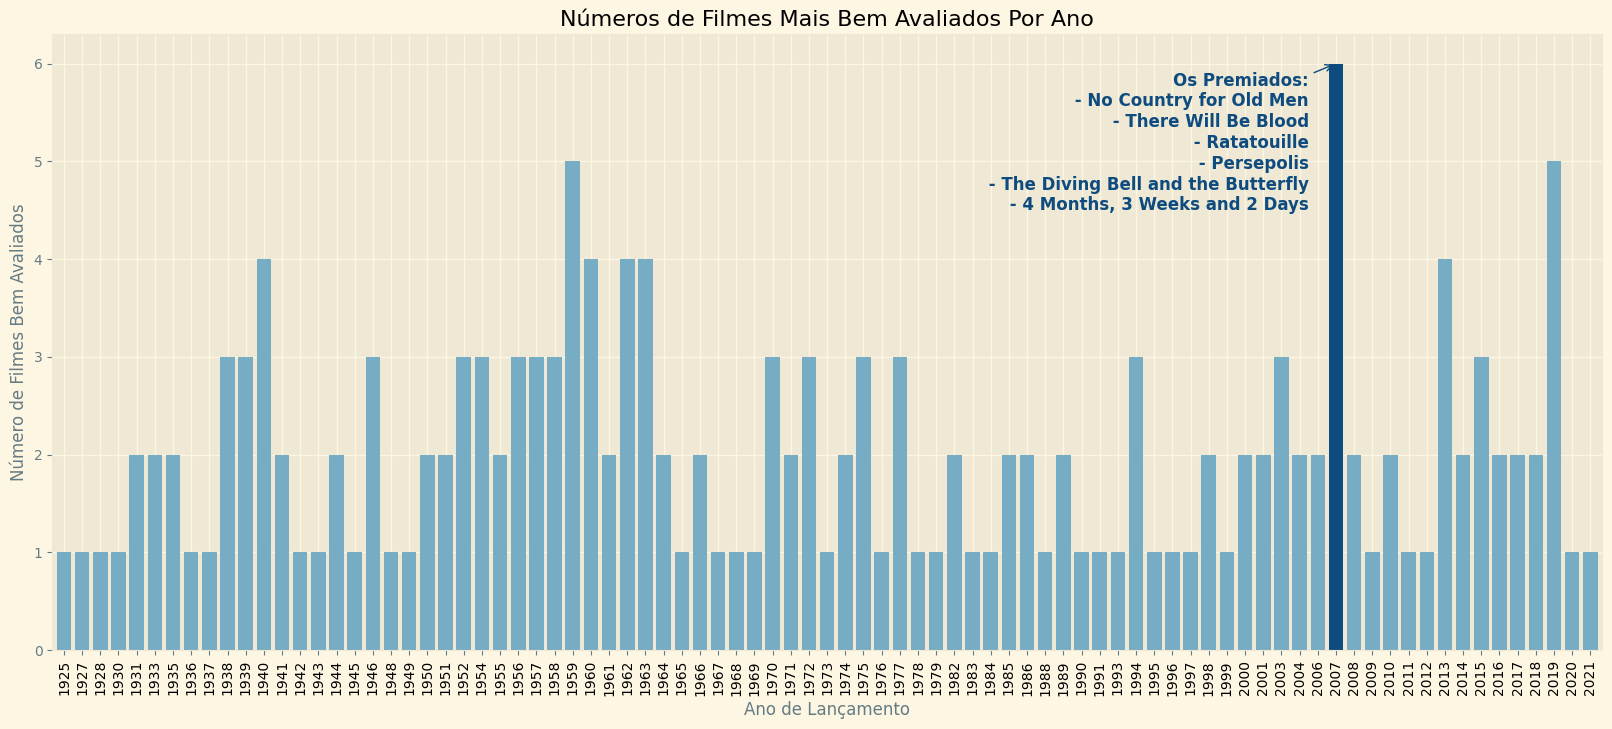

In [35]:
# plotar gráfico de colunas - número de filmes mais bem avaliados por ano

# agrupando o número de lançamentos por ano
grouped = filtro_top_filmes.groupby("Year of Release").size()

# definir as cores das barras, destacando o ano de 2007
colors = ['#0e4b7e' if year == 2007 else '#77acc5' for year in grouped.index]

# definir o tamanho da figura
plt.style.use("Solarize_Light2") # definição do estilo do gráfico
plt.figure(figsize=(20, 8))

# plotar o gráfico de barras com as cores personalizadas
grouped.plot(kind="bar", width=0.8, color=colors)

# adicionar título e rótulos aos eixos
plt.title("Números de Filmes Mais Bem Avaliados Por Ano")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Número de Filmes Bem Avaliados")

# adicionar anotação para o ano de 2007
plt.annotate(
    "Os Premiados:\n - No Country for Old Men\n - There Will Be Blood\n - Ratatouille\n - Persepolis\n - The Diving Bell and the Butterfly\n - 4 Months, 3 Weeks and 2 Days",               # Texto da anotação
    xy=(grouped.index.get_loc(2007), grouped[2007]),  # Posição do ponto de anotação
    xytext=(grouped.index.get_loc(2007) - 1.5, grouped[2007] - 1.5),  # Posição do texto (deslocado à direita e acima)
    arrowprops=dict(facecolor='#0e4b7e', edgecolor='#0e4b7e', arrowstyle='->'),  # Estilo da seta mais curto
    fontsize=12,                 # Tamanho da fonte
    color='#0e4b7e',               # Cor do texto
    ha='right',                    # Alinhamento horizontal do texto
    fontweight='bold'                      # Negrito no texto
)

# customizar os rótulos do eixo x
plt.xticks(color='black')  # Altera a cor para vermelho e aumenta o tamanho da fonte para 14

# salvar o gráfico localmente
plt.savefig('bemavaliados_por_ano.png')  # Salva o gráfico como um arquivo PNG

# mostrar o gráfico
plt.show()

O primeiro filme mais bem avaliado foi em 1925, cinco anos depois do início dos registros do IMDb. E fica claro que o ano de ouro para filmes bem avaliados foi o ano de 2007, no total fora 6 filmes lançado neste ano. Ciente disso, vamos identificar quais filmes são esses.

In [36]:
# filmes lançados em 2007
filtro_top_filmes[filtro_top_filmes["Year of Release"] == 2007]

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
No Country for Old Men,2007,122,8.2,92,74.28,Violence and mayhem ensue after a hunter stumb...,2.0,2000
There Will Be Blood,2007,158,8.2,93,40.22,"A story of family, religion, hatred, oil and m...",2.6,2000
Ratatouille,2007,111,8.1,96,206.45,A rat who can cook makes an unusual alliance w...,1.8,2000
Persepolis,2007,96,8.0,90,4.45,A precocious and outspoken Iranian girl grows ...,1.6,2000
The Diving Bell and the Butterfly,2007,112,8.0,92,5.99,The true story of Elle editor Jean-Dominique B...,1.9,2000
"4 Months, 3 Weeks and 2 Days",2007,113,7.9,97,1.19,A woman assists her friend in arranging an ill...,1.9,2000


O "ano de ouro" apresenta filmes de diversos gêneros, não há uma categoria específica que mais se destaca.

Aproveitando um insight que o gráfico nos trouxe, vamos identificar qual foi o primeiro filme a atingir nossos critérios de bem avaliados.

In [37]:
# filmes lançados em 1920
filtro_top_filmes[filtro_top_filmes["Year of Release"] == 1925]

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
Battleship Potemkin,1925,66,8.0,97,0.05,In the midst of the Russian Revolution of 1905...,1.1,1920


A primeira produção a atingir nosso critério foi a Battleship Potemkin - 1925, uma produção soviética.

### 3.   Qual década registrou mais notáveis produções?


In [38]:
# filmes mais bem avaliados por década
filtro_top_filmes.groupby("Decada").size().sort_values(ascending=False)

,0
Decada,
1950,26
2010,24
1960,22
1970,20
2000,20
1940,16
1930,15
1990,12
1980,11


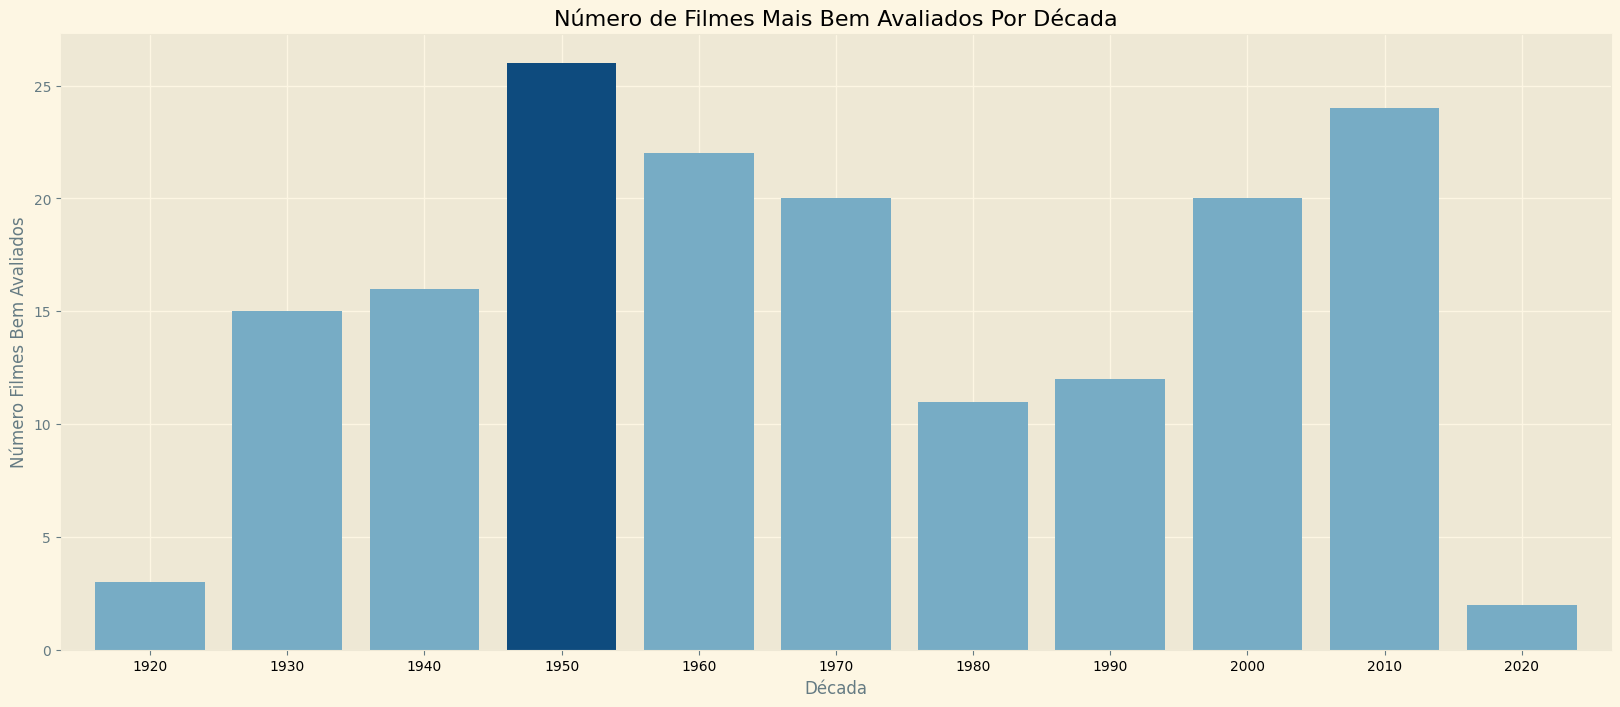

In [39]:
# plotar gráfico de colunas - número de filmes mais bem avaliados por década
grouped_decada = filtro_top_filmes.groupby("Decada").size()

# definir as cores das barras, destacando o ano de 1950
colors = ['#0e4b7e' if decada == 1950 else '#77acc5' for decada in grouped_decada.index]

# definir o tamanho da figura
plt.style.use("Solarize_Light2") # definição do estilo do gráfico
plt.figure(figsize=(20, 8))

# plotar o gráfico de barras com as cores personalizadas
grouped_decada.plot(kind="bar", width=0.8, color=colors)

# adicionar título e rótulos aos eixos
plt.title("Número de Filmes Mais Bem Avaliados Por Década")
plt.xlabel("Década")
plt.ylabel("Número Filmes Bem Avaliados")
plt.xticks(rotation=0)

# customizar os rótulos do eixo x
plt.xticks(color='black')  # Altera a cor para vermelho e aumenta o tamanho da fonte para 14

# salvar o gráfico localmente
plt.savefig('topfilmes_por_decada.png')  # Salva o gráfico como um arquivo PNG

# mostrar o gráfico
plt.show()

Por essa acho que ninguém esperava. A década de 1950 é quem registra o maior número de filmes mais bem avaliados pelo IMDb, ao todo foram 26 filmes com altas notas neste período.

Também fica o adendo da grande queda durante as décadas seguintes, com nenhuma década registrando nada parecido, com somente na década de 2010 esse número voltando a se aproximar das casas de 25 filmes mais bem avaliados em uma única década.

Obs: Descartemos a década de 2020, pois há poucos registros nesse período.

In [40]:
# calcular as contagens por década para ambos os DataFrames
contagem_df_clean = df_clean.groupby("Decada").size()
contagem_filtro_top_filmes = filtro_top_filmes.groupby("Decada").size()

# criar um DataFrame com essas informações
tabela = pd.DataFrame({
    'Contagem_df_clean': contagem_df_clean,
    'Contagem_filtro_top_filmes': contagem_filtro_top_filmes
})

# calcular a porcentagem
tabela['Porcentagem'] = (tabela['Contagem_filtro_top_filmes'] / tabela['Contagem_df_clean']).round(2)

# Renomear as colunas
tabela = tabela.rename(columns={
    'Contagem_df_clean': 'Total Filmes Lançados',
    'Contagem_filtro_top_filmes': 'Total de Filmes Bem Avaliados',
    'Porcentagem': '%de Filmes Bem Avaliados na Década'
})

# exibir a tabela final
calculo = tabela.style.background_gradient(subset=['%de Filmes Bem Avaliados na Década'], cmap="Blues")

# exibir tabela
calculo

,Total Filmes Lançados,Total de Filmes Bem Avaliados,%de Filmes Bem Avaliados na Década
Decada,,,
1920,11,3,0.270000
1930,26,15,0.580000
1940,38,16,0.420000
1950,60,26,0.430000
1960,74,22,0.300000
1970,69,20,0.290000
1980,90,11,0.120000
1990,144,12,0.080000
2000,227,20,0.090000


Apesar de ser a década com filmes mais bem avaliados, a década de 50 fica só terceira colocação quando o assunto é aproveitamento. Quem é o responsável pelo topo é a década de 30, que com 26 filmes lançados nesse período, teve 15 como bem avaliados.

### 4.   Há um padrão entre os melhores?

Para responder essa pergunta, precisaremos fazer algumas tarefas para entender o comportamento desses filmes que figuram nos mais bem avaliados pelo IMDb e comparar com aqueles que não figuram.

Para entender o comportamento dos filmes mais bem avaliados, compararemos com os filmes que não entraram nessa lista e para isso, criaremos um novo filtro, onde nele, removeremos as linhas que pertencem os filmes mais bem avaliados.



In [41]:
# filtrando o DataFrame removendo as linhas dos top filmes
df_other_films = df_clean[~df_clean.index.isin(filtro_top_filmes.index)]
df_other_films.head()

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
Jai Bhim,2021,164,8.9,0,0.00,When a tribal man is arrested for a case of al...,2.7,2020
Inception,2010,148,8.8,74,292.58,A thief who steals corporate secrets through t...,2.5,2010
The Lord of the Rings: The Two Towers,2002,179,8.8,87,342.55,While Frodo and Sam edge closer to Mordor with...,3.0,2000
Fight Club,1999,139,8.8,66,37.03,An insomniac office worker and a devil-may-car...,2.3,1990
Forrest Gump,1994,142,8.8,82,330.25,"The presidencies of Kennedy and Johnson, the V...",2.4,1990


In [42]:
# identificar número de linhas do novo DataFrame
df_other_films.shape[0]

829

Operação efetuada, o DataFrame `df_other_filmes` ficou com **829 linhas**, pois subtraiu as **171 linhas** do Dataframe `filtro_top_filmes`. A partir de agora podemos fazer as comparações entre ambos os DataFrames.

Para cálculo, vamos usar a **mediana** como medida central, pois ambos os DataFrames possuem tamanhos diferentes, a mediana irá nos ajudar a encontrar a medida central mais equilibrada para esse cenário.


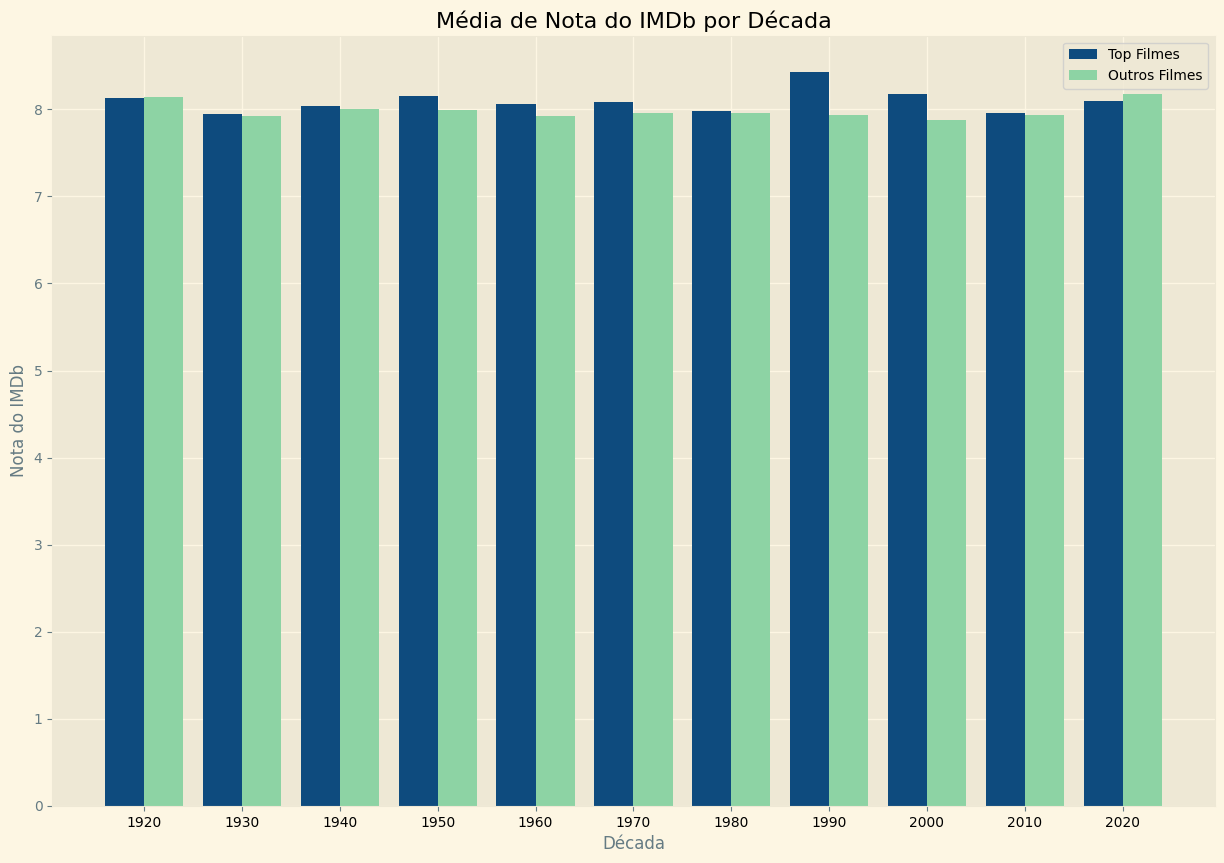

In [43]:
# plotar gráfico de colunas - media de "Movie Rating"
# definir o estilo do gráfico
plt.style.use("Solarize_Light2")

# calcular a média de "Watch Time" por década
top_filmes_mean = filtro_top_filmes.groupby("Decada")["Movie Rating"].mean()
other_filmes_mean = df_other_films.groupby("Decada")["Movie Rating"].mean()

# obter as décadas e ajustar os índices para garantir que estejam alinhados
decadas = top_filmes_mean.index
x_axis = np.arange(len(decadas))

# criar o gráfico de barras duplas
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x_axis - 0.2, top_filmes_mean, width=0.4, label='Top Filmes', color="#0e4b7e")
ax.bar(x_axis + 0.2, other_filmes_mean, width=0.4, label='Outros Filmes', color="#8dd3a4")

# ajustar rótulos e título
ax.set_xticks(x_axis)
ax.set_xticklabels(decadas)
ax.set_title("Média de Nota do IMDb por Década")
ax.set_ylabel("Nota do IMDb")
ax.set_xlabel("Década")

# adicionar a legenda
ax.legend()

# customizar os rótulos do eixo x
plt.xticks(color='black')

# salvar o gráfico localmente
plt.savefig('comportamento_decada_movierating.png')

# mostrar o gráfico
plt.show()

É possível observar que como esperado, a média de nota dos **filmes mais bem avaliados** é maior que a dos **outros filmes**, isso em quase todas as décadas. O maior pico se teve na década de 1990, quando a década obteve a nota 9 de média para os filme mais bem avaliados, a década também registrou a maior diferença entre os dois grupos.

Obs: novamente disconsideremos a década de 2020, pois a amostra de dados desse período é muito pequena.

____

Já que estamos falando sobre nota do IMDb, vamos identificar qual é o filme com maior nota nesse critério.


In [44]:
# identificar filme com maior nota na variável Movie Rating (Nota do IMDb)
filtro_top_filmes.loc[filtro_top_filmes.index].nlargest(1, "Movie Rating")

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
The Shawshank Redemption,1994,142,9.3,81,28.34,Two imprisoned men bond over a number of years...,2.4,1990


***The Shawshank Redemption - 1994 - Um Sonho de Liberdade*** em português, é o filme com maior nota no **IMDb: 9.3** é a nota do público para a produção, mas parece que para os críticos do cinema, o filme não é tão bom assim: **81/100** foi a nota que os criteriosos críticos deram para o filme.

Observando os dois insights, podemos levantar a hipótese que o filme *The Shawshank Redemption*, pode ter sido o responsável pelo alto pico de média na nota na de década 1990.

Seguindo nossa análise, chegou a hora de observar o comportamento da média de nota dos críticos do cinema durante as décadas.

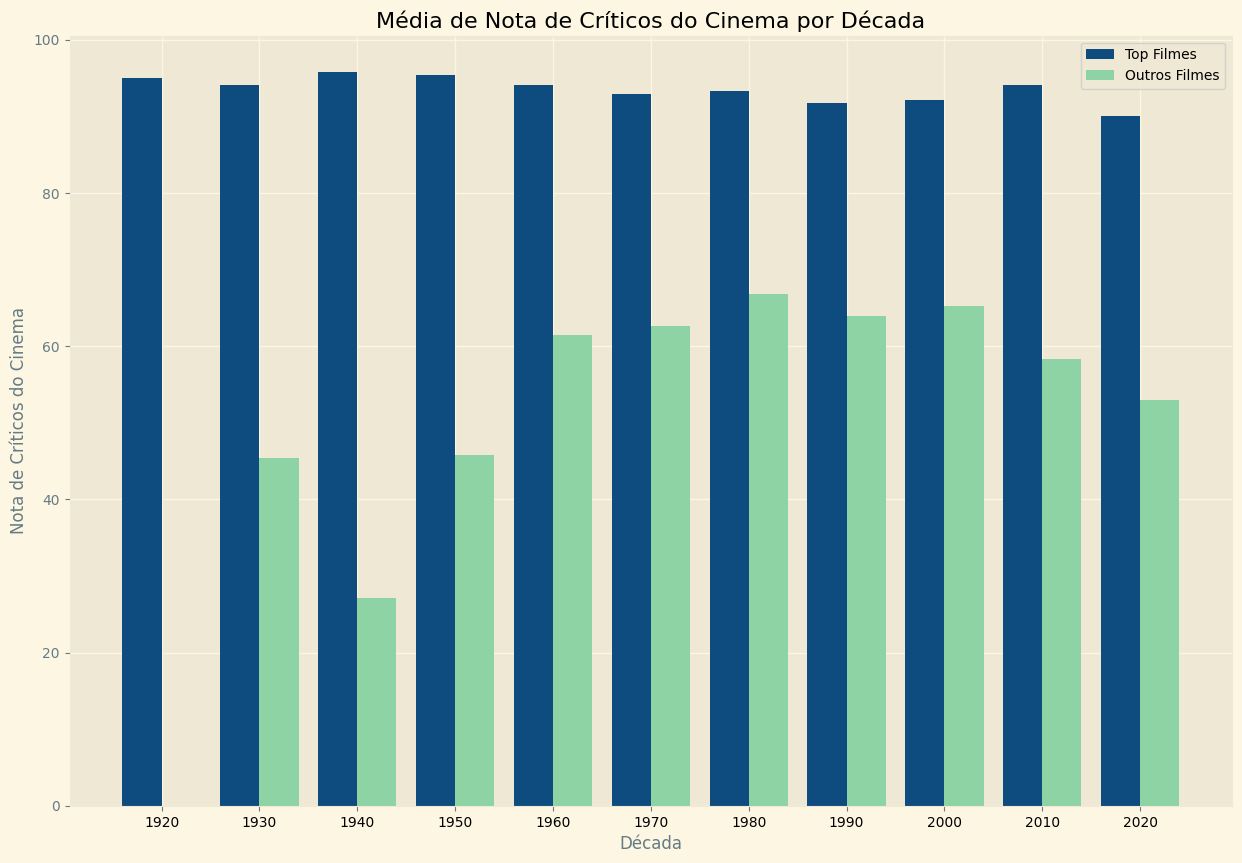

In [45]:
# plotar gráfico de colunas - média de "Meatscore of movie"
# definir o estilo do gráfico
plt.style.use("Solarize_Light2")

# calcular a média de "Watch Time" por década
top_filmes_mean = filtro_top_filmes.groupby("Decada")["Meatscore of movie"].mean()
other_filmes_mean = df_other_films.groupby("Decada")["Meatscore of movie"].mean()

# obter as décadas e ajustar os índices para garantir que estejam alinhados
decadas = top_filmes_mean.index
x_axis = np.arange(len(decadas))

# criar o gráfico de barras duplas
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x_axis - 0.2, top_filmes_mean, width=0.4, label='Top Filmes', color="#0e4b7e")
ax.bar(x_axis + 0.2, other_filmes_mean, width=0.4, label='Outros Filmes', color="#8dd3a4")

# ajustar rótulos e título
ax.set_xticks(x_axis)
ax.set_xticklabels(decadas)
ax.set_title("Média de Nota de Críticos do Cinema por Década")
ax.set_ylabel("Nota de Críticos do Cinema")
ax.set_xlabel("Década")

# adicionar a legenda
ax.legend()

# customizar os rótulos do eixo x
plt.xticks(color='black')

# salvar o gráfico localmente
plt.savefig('comportamento_decada_meatscoreofmovie.png')

# mostrar o gráfico
plt.show()

Obviamente, como esperado, a média de notas dos top filmes são maiores do que as notas dos outros filmes e essas top notas apresentam uma média bem parecida entre todas as décadas, nota média de 95, apesar de ser possível identificar uma leve queda a partir da década de 1950, mas essa volta a se estabelecer décadas seguintes.

Fica outro insight interessante que a maior diferença entre os dois grupos foi na década de 40, quando a média de nota dos top filmes bateu próximo de 100, enquanto os outros filmes não chegaram na nota 30 de média, para os críticos do cinema. Após essa década os críticos pareceram não ser tão critorisos, já que a média de notas desses filmes tiveram uma aumento considerável a partir de então.

Seguindo avaliando o comportamento entre os dois grupos, vamos analisar agora a média de minutos entre ambos durante as décadas.

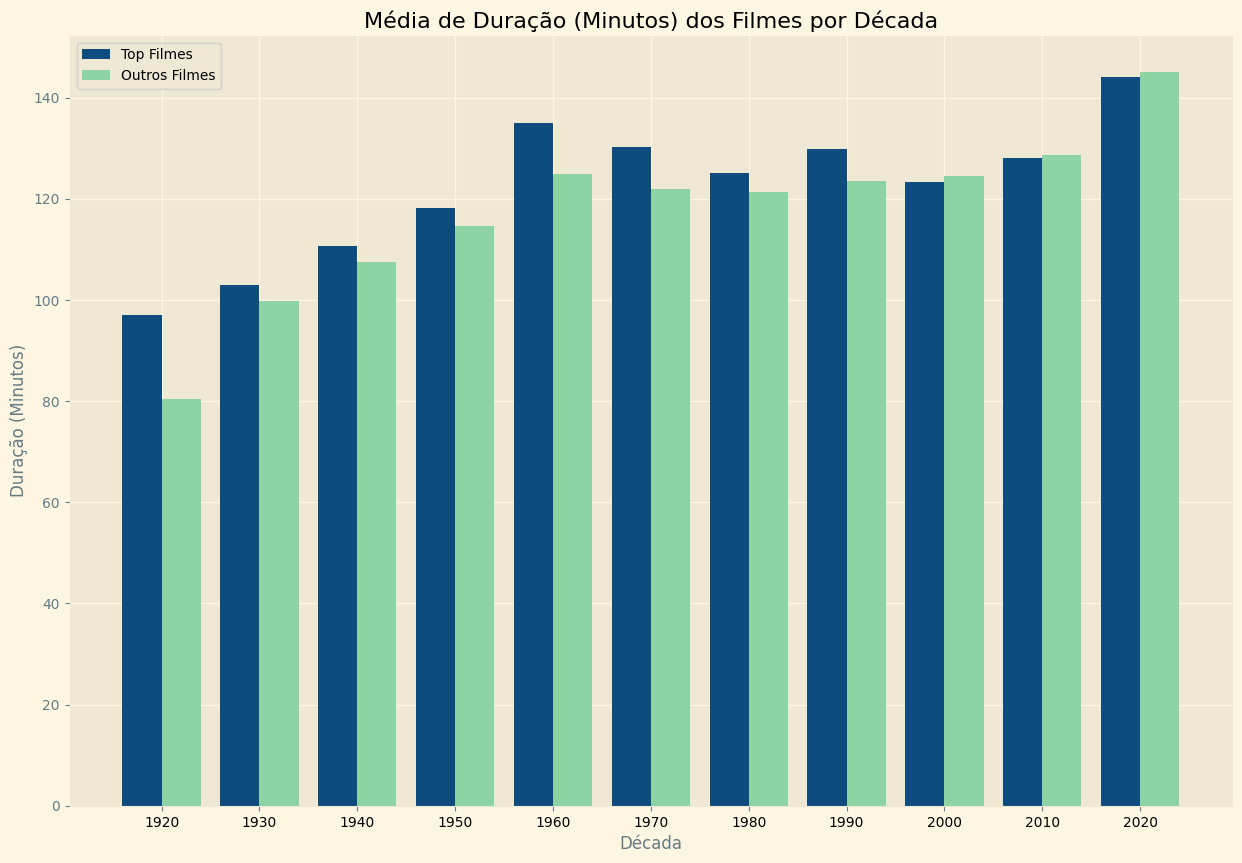

In [46]:
# plotar gráfico de colunas - identificar comportamento dos filmes pela variável Watch Time

# definir o estilo do gráfico
plt.style.use("Solarize_Light2")

# calcular a média de "Watch Time" por década
top_filmes_mean = filtro_top_filmes.groupby("Decada")["Watch Time"].mean()
other_filmes_mean = df_other_films.groupby("Decada")["Watch Time"].mean()

# obter as décadas e ajustar os índices para garantir que estejam alinhados
decadas = top_filmes_mean.index
x_axis = np.arange(len(decadas))

# criar o gráfico de barras duplas
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x_axis - 0.2, top_filmes_mean, width=0.4, label='Top Filmes', color="#0e4b7e")
ax.bar(x_axis + 0.2, other_filmes_mean, width=0.4, label='Outros Filmes', color="#8dd3a4")

# ajustar rótulos e título
ax.set_xticks(x_axis)
ax.set_xticklabels(decadas)
ax.set_title("Média de Duração (Minutos) dos Filmes por Década")
ax.set_ylabel("Duração (Minutos)")
ax.set_xlabel("Década")

# adicionar a legenda
ax.legend()

# customizar os rótulos do eixo x
plt.xticks(color='black')

# salvar o gráfico localmente
plt.savefig('comportamento_decada_watchtime.png')

# mostrar o gráfico
plt.show()


Antes de tudo, podemos observar que a duração média (em minutos) dos filmes veio aumentando durante as décadas, se estagnando entre as décadas de 1970 a 2000, mas voltando a subir média a partir da década seguinte.

Agora observando o comportamento entre os dois grupos, a média em minutos ficou num "sobe e desce" entre ambos durante as décadas, algumas décadas, filmes fora do topo tiveram uma média de minutos maior, outras décadas, foram os filmes do topo que lideraram a média de minutos. **Assim evidencia que essa característica é pouco ou zero relevante para uma produção estar entre os top filmes.**

###   5.   Quanto arrecadou os filmes mais bem avaliados?

Como na pergunta anterior, também vamos usar a **mediana** como medida central, além do motivo citado na 4ª pergunta, vimos na etapa de exploração dos dados, que há alguns outliers na variável `Gross`, com isso, usar a média poderia causar algum viés ao cálculo, por isso escolhemos a mediana, ela irá nos ajudar a encontrar a medida mais adequada para esta análise.


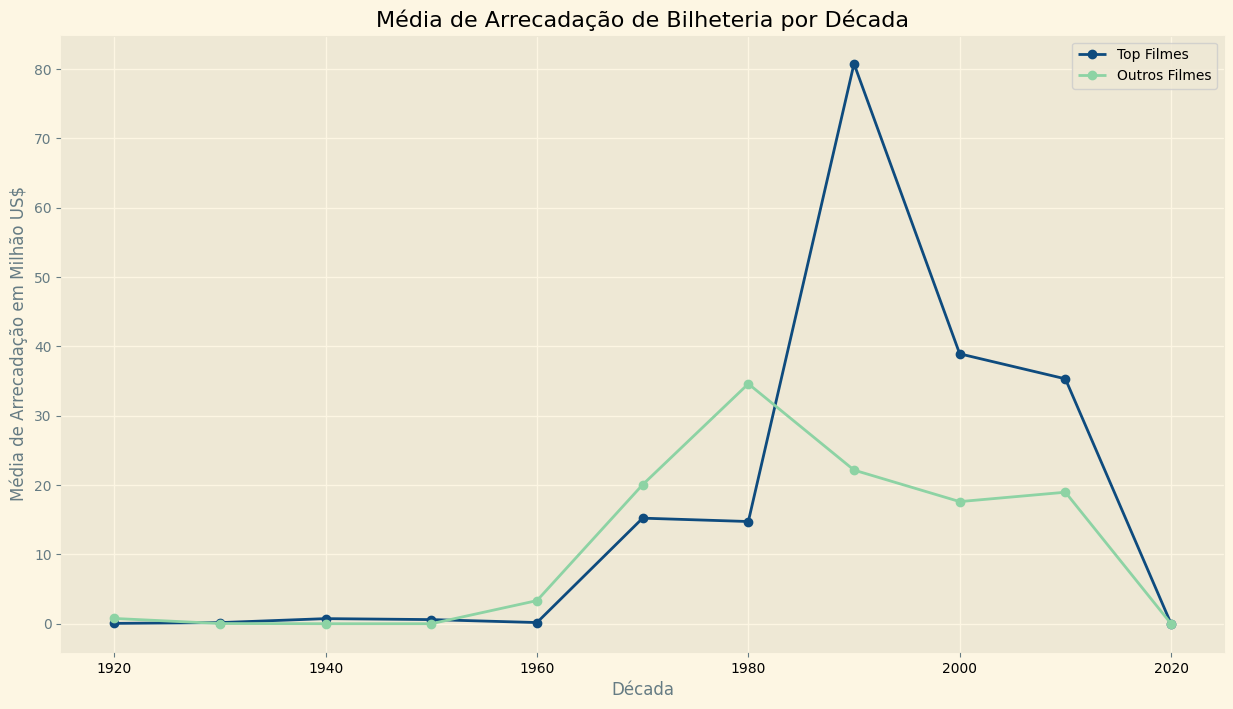

In [47]:
# plotar gráfico de linha - calcular o bilheteria por década para ambos os perfis de filmes

# filtrar DataFrames e calcular suas medidads centrais por década
topfilmesfatu = filtro_top_filmes.groupby("Decada")["Gross"].median()
nottopfilmesfatu = df_other_films.groupby("Decada")["Gross"].median()

# garantir que ambos os DataFrames tenham as mesmas décadas como índice
decades = sorted(set(topfilmesfatu.index).union(nottopfilmesfatu.index))
topfilmesfatu = topfilmesfatu.reindex(decades, fill_value=0)
nottopfilmesfatu = nottopfilmesfatu.reindex(decades, fill_value=0)

# criar o gráfico de linha
plt.style.use("Solarize_Light2")
plt.figure(figsize=(15, 8))
plt.plot(topfilmesfatu.index, topfilmesfatu, marker='o', color='#0e4b7e', label='Top Filmes')
plt.plot(nottopfilmesfatu.index, nottopfilmesfatu, marker='o', color='#8dd3a4', label='Outros Filmes')

# adicionar título e rótulos aos eixos
plt.title('Média de Arrecadação de Bilheteria por Década')
plt.xlabel('Década')
plt.ylabel('Média de Arrecadação em Milhão US$')
plt.xticks(rotation=0)

# adicionar uma legenda
plt.legend()

# customizar os rótulos do eixo x
plt.xticks(color='black')

# salvar o gráfico localmente
plt.savefig('bilheteria_por_decada.png')  # Salva o gráfico como um arquivo PNG

# mostrar o gráfico
plt.show()

A linha azul representa os 171 filmes mais bem avaliados, a linha verde representa os 829 filmes que não entraram nessa lista.

Analisando o gráfico é possível avaliar que a arrecadação teve um grande crescimento nas décadas recentes, claro, excluindo a década de 2020, qual temos poucos dados. Isso pode ter a ver com o aumento de filmes lançados nas recentes décadas e a também novas formas de arrecadação.

Colocado que ambas linhas representam volumes diferentes, elas apresentam um comportamento parecido até a década de 1970, tudo muda a partir da década de 80, quando os filmes fora do topo apresentam uma média de quase 35 milhões de dólares arrecadados por filme, superando os quase 15 milhões do grupo top filmes.

Mas chega a década de 1990 e os top filmes tomam a dianteira com o maior pico de arrecadação por década na história, superando os 80 milhões de dólares de média arrecados por filme. Os top filmes se mantiveram na frente nas décadas seguintes mesmo apresentando uma queda na média de arrecadação, a década 2000 apresentou um média de quase 40 milhões e 2010 um pouco mais de 35 milhões de dólares arrecados por filme.

Portanto, fica claro que em décadas recentes os filmes mais bem avaliados arrecadaram mais em bilheteria do que o outro grupo, assim podemos concluir que entrar no grupo de filmes bem avaliados também foi sinônimo de arrecadar mais em bilheterias.



Abaixo, deixarei uma tabela com as respectivas médias por década, assim será possível analisar com os números exatos.

In [48]:
# media (mediana) de bilheteria (Gross) dos dois grupos
mediana_filtro_top_filmes = filtro_top_filmes.groupby("Decada")["Gross"].median()
mediana_df_other_films = df_other_films.groupby("Decada")["Gross"].median()

# criar um DataFrame com essas informações
df_medianas = pd.DataFrame({
    'Media de Bilheteria Top Filmes': mediana_filtro_top_filmes,
    'Media de Bilheteria Outros Filmes': mediana_df_other_films
})

# exibir o DataFrame
df_medianas

,Media de Bilheteria Top Filmes,Media de Bilheteria Outros Filmes
Decada,,
1920,0.050,0.760
1930,0.160,0.030
1940,0.735,0.000
1950,0.595,0.000
1960,0.170,3.335
1970,15.225,20.050
1980,14.740,34.600
1990,80.760,22.155
2000,38.925,17.610


### 6. Dos filmes mais bem avaliados, qual arrecadou mais?

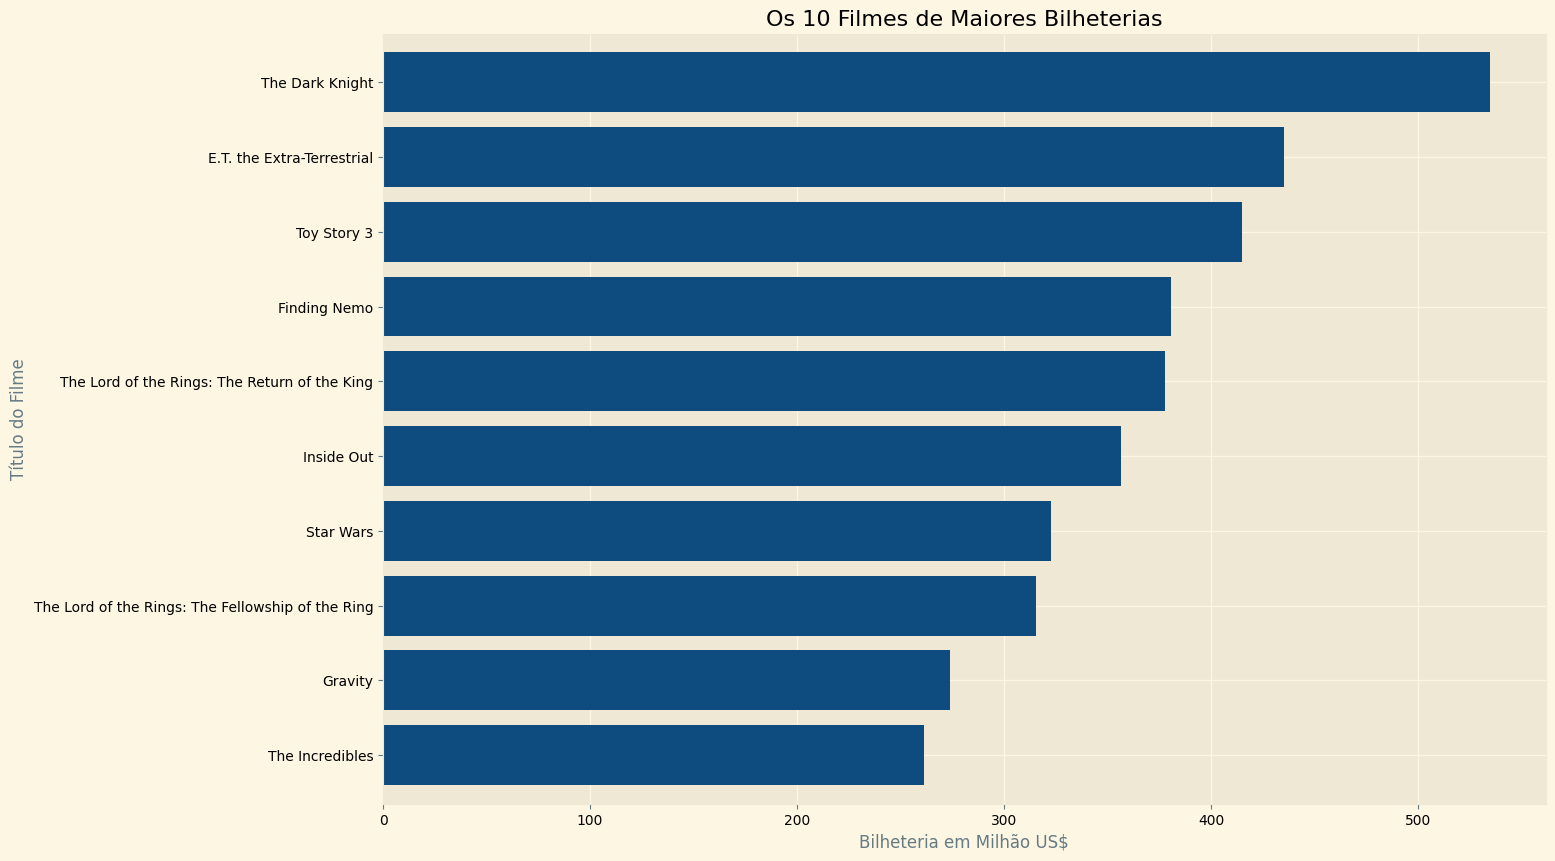

In [49]:
# plotar gráfico de barras - os 10 filmes de mariores bilheterias
plt.style.use("Solarize_Light2")
plt.figure(figsize=(15, 10))

# plotar gráfico
topbilheteria = filtro_top_filmes["Gross"].sort_values(ascending=True)
topbilheteria.tail(10).plot(kind="barh", color="#0e4b7e", width=0.8)

# adicionar título e rótulos aos eixos
plt.title("Os 10 Filmes de Maiores Bilheterias")
plt.xlabel("Bilheteria em Milhão US$")
plt.ylabel('Título do Filme')

# customizar os rótulos do eixo x
plt.xticks(color='black')
plt.yticks(color='black')

# salvar o gráfico localmente
plt.savefig('top10_filmes_gross.png')  # Salva o gráfico como um arquivo PNG

# mostrar o gráfico
plt.show()

***Batman, The Dark Night - 2018*** lidera a lista de filmes que mais arrecadaram é a única produção que supera a casa de quinhentos milhões de dólares em bilheteria.

Já que o gráfico apresenta o top 10 e ao invés de eu citar todos eles em texto aqui. Abaixo, apresento em detalhes esse top 10 filmes que mais arrecadaram, destacando a coluna `Gross` (bilheteria) em azul gradiente, destacando do maior para a menor.

In [50]:
# Selecionar os 10 filmes com maior valor na coluna "Gross"
top_gross_filmes = filtro_top_filmes.sort_values(by="Gross", ascending=False).head(10)

# Aplicar o gradiente de cor azul na coluna "Gross"
top_gross_filmes_styled = top_gross_filmes.style.background_gradient(subset=['Gross'], cmap='Blues')

# Exibir o DataFrame com o estilo aplicado
top_gross_filmes_styled

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
The Dark Knight,2008,152,9.000000,84,534.860000,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2.500000,2000
E.T. the Extra-Terrestrial,1982,115,7.900000,91,435.110000,A troubled child summons the courage to help a friendly alien escape from Earth and return to his home planet.,1.900000,1980
Toy Story 3,2010,103,8.300000,92,415.000000,"The toys are mistakenly delivered to a day-care center instead of the attic right before Andy leaves for college, and it's up to Woody to convince the other toys that they weren't abandoned and to return home.",1.700000,2010
Finding Nemo,2003,100,8.200000,90,380.840000,"After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home.",1.700000,2000
The Lord of the Rings: The Return of the King,2003,201,9.000000,94,377.850000,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,3.400000,2000
Inside Out,2015,95,8.200000,94,356.460000,"After young Riley is uprooted from her Midwest life and moved to San Francisco, her emotions - Joy, Fear, Anger, Disgust and Sadness - conflict on how best to navigate a new city, house, and school.",1.600000,2010
Star Wars,1977,121,8.600000,90,322.740000,"Luke Skywalker joins forces with a Jedi Knight, a cocky pilot, a Wookiee and two droids to save the galaxy from the Empire's world-destroying battle station, while also attempting to rescue Princess Leia from the mysterious Darth Vader.",2.000000,1970
The Lord of the Rings: The Fellowship of the Ring,2001,178,8.800000,92,315.540000,A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.,3.000000,2000
Gravity,2013,91,7.700000,96,274.090000,Two astronauts work together to survive after an accident leaves them stranded in space.,1.500000,2010


**Outro insight interessante que é possível colher, dessa análise de top 10 filmes que mais arrecadaram: É que 8 das 10 maiores bilheterias foram a partir dos anos 2000, isto pode indicar o crescimento do mercado cinematográfico, como também já disse anteriormente, novas formas de arrecadação, não se restringindo apenas a bilheteria comum.**

Vamos a próxima pergunta.

### 7. Será que quanto maior a nota do IMDb, maior a arrecadação de bilheteria do filme?

Confesso que analisando o gráfico acima, me surgiu uma curiosidade que acabou gerando uma nova pergunta que é - **será que quanto maior a nota do IMDb, maior a arrecadação de bilheteria do filme?** Com isso em mente e através de um gráfico de dispersão, tentaremos responder essa pergunta.

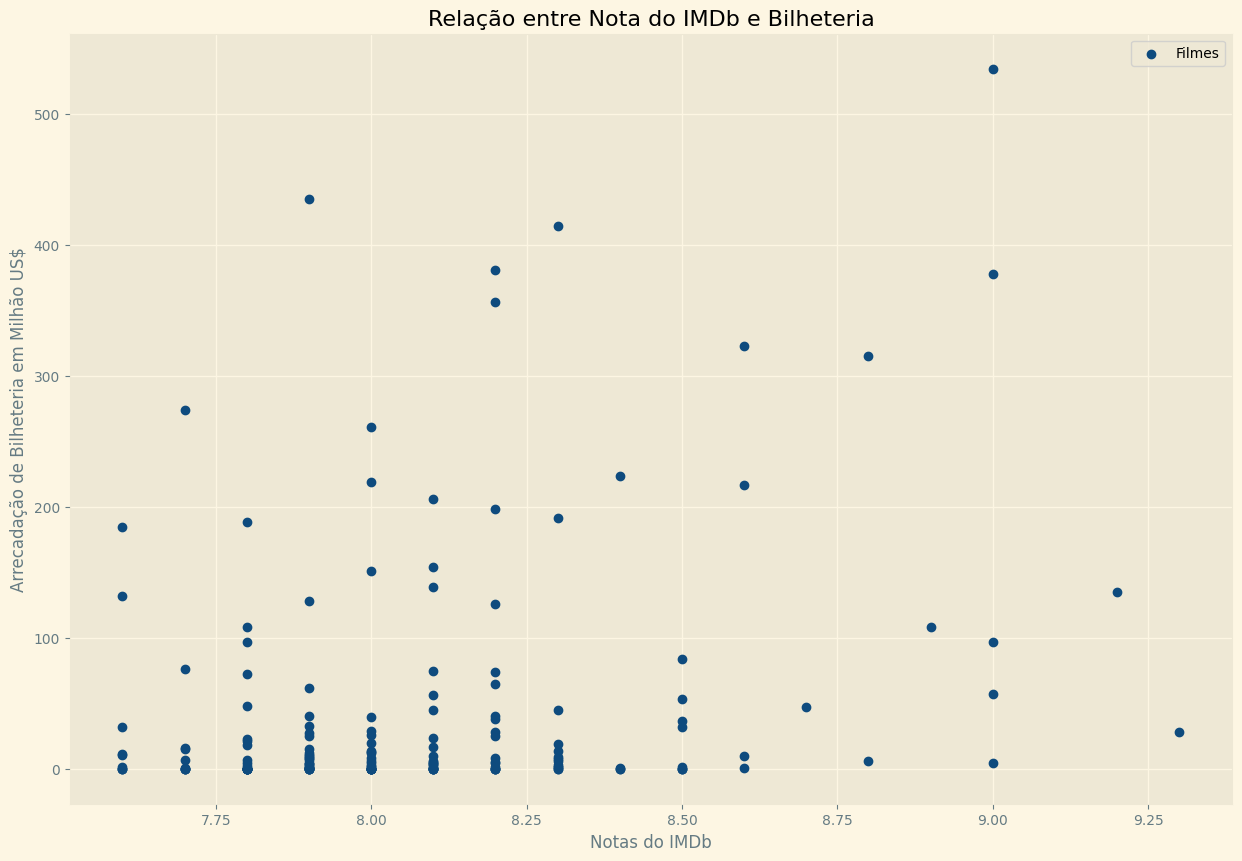

In [51]:
# plotar gráfico de dispersão - relação entre Nota do IMDb (Movie Rate) e Bilheteria (Gross)

# gráfico de dispersão
plt.style.use("Solarize_Light2")
plt.figure(figsize=(15, 10))
plt.scatter(filtro_top_filmes['Movie Rating'], filtro_top_filmes['Gross'], color='#0e4b7e', label='Filmes')

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Nota do IMDb e Bilheteria')
plt.xlabel('Notas do IMDb')
plt.ylabel('Arrecadação de Bilheteria em Milhão US$')

# Adicionar uma legenda
plt.legend()

# salvar o gráfico localmente
plt.savefig('relacao_movierating_gross.png')  # Salva o gráfico como um arquivo PNG

# mostrar o gráfico
plt.show()


Com relação aos filmes mais bem avaliados da base de dados do IMDb (171 filmes), é possível confirmar que o número de bilheteria não sobe conforme o número de nota do IMDb também sobe e o contrário também é verdadeiro, portanto, não há uma relação entre as duas variáveis.


Seguindo na busca de entender se há relações entre as variávies, agora, vamos analisar além de uma possível relação, também vamos verificar a distribuição de notas do IMDb junto as notas de críticos do cinema.


### 8. Qual é a distribuição de notas entre os filmes mais bem avaliados?

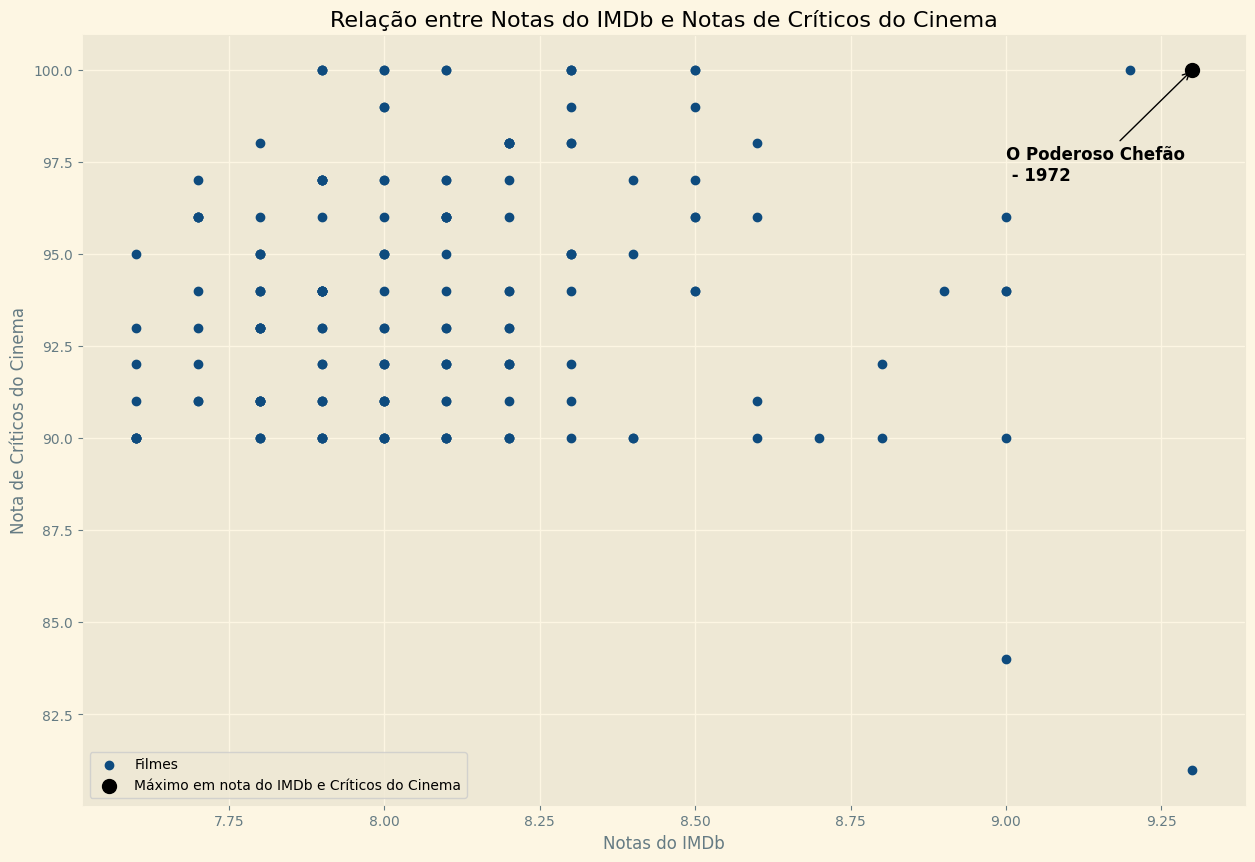

In [52]:
# plotar gráfico de dispersão - distribuição de notas IMDb e críticos do cinema
# encontrar o ponto com pontuação máxima em ambas as variáveis
max_rating = filtro_top_filmes['Movie Rating'].max()
max_meatscore = filtro_top_filmes['Meatscore of movie'].max()

# criar o scatter plot
plt.style.use("Solarize_Light2")
plt.figure(figsize=(15, 10))
plt.scatter(filtro_top_filmes['Movie Rating'], filtro_top_filmes['Meatscore of movie'], color='#0e4b7e', label='Filmes')

# destacar o ponto com valores máximos
plt.scatter(max_rating, max_meatscore, color='black', s=100, label='Máximo em nota do IMDb e Críticos do Cinema')

# adicionar título e rótulos aos eixos
plt.title('Relação entre Notas do IMDb e Notas de Críticos do Cinema')
plt.xlabel('Notas do IMDb')
plt.ylabel('Nota de Críticos do Cinema')

# adicionar uma legenda
plt.legend()

# adicionar anotação para "O Poderoso Chefão" no ponto máximo
plt.annotate(
    "O Poderoso Chefão\n - 1972",                 # Texto da anotação
    xy=(max_rating, max_meatscore),      # Posição do ponto anotado
    xytext=(max_rating -0.3 , max_meatscore - 3),  # Posição do texto deslocado mais para baixo
    arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'),  # Estilo da seta
    fontsize=12,                         # Tamanho da fonte
    color='black',                        # Cor do texto
    fontweight='bold'                      # Negrito no texto
)

# salvar o gráfico localmente
plt.savefig('relacao_movierating_meatscoreofmovie.png')  # Salva o gráfico como um arquivo PNG

# mostrar o gráfico
plt.show()

A distribuição entre notas do IMDb e críticos do cinema não apresentam uma relação, apesar de serem notas, ambas parecem possuir critérios diferentes quando o assunto é avaliar os filmes.

A fim, de inserir mais detalhes ao notebook, abaixo trago em mais detalhes, os 20 melhores pontos(filmes) que acompanham o *The Godfather* no topo na distribuição das notas do IMDb (`Movie Rating`) e críticos do cinema (`Meatscore of Movie`).

In [53]:
# detalhes filmes ordenando por movie rating e meatscore of movie em ordem
styled_table = filtro_top_filmes.sort_values(by=["Meatscore of movie", "Movie Rating"], ascending=False).head(20).style.background_gradient(subset=["Movie Rating", "Meatscore of movie"], cmap="Blues").set_caption("Relação entre Notas do IMDb e Notas de Críticos do Cinema")

# exibir tabela
styled_table

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
The Godfather,1972,175,9.200000,100,134.970000,The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.,2.900000,1970
Rear Window,1954,112,8.500000,100,36.760000,"A wheelchair-bound photographer spies on his neighbors from his Greenwich Village courtyard apartment window, and becomes convinced one of them has committed murder, despite the skepticism of his fashion-model girlfriend.",1.900000,1950
Casablanca,1942,102,8.500000,100,1.020000,A cynical expatriate American cafe owner struggles to decide whether or not to help his former lover and her fugitive husband escape the Nazis in French Morocco.,1.700000,1940
Lawrence of Arabia,1962,218,8.300000,100,44.820000,"The story of T.E. Lawrence, the English officer who successfully united and led the diverse, often warring, Arab tribes during World War I in order to fight the Turks.",3.600000,1960
Vertigo,1958,128,8.300000,100,3.200000,"A former San Francisco police detective juggles wrestling with his personal demons and becoming obsessed with the hauntingly beautiful woman he has been hired to trail, who may be deeply disturbed.",2.100000,1950
Citizen Kane,1941,119,8.300000,100,1.590000,"Following the death of publishing tycoon Charles Foster Kane, reporters scramble to uncover the meaning of his final utterance: 'Rosebud.'",2.000000,1940
Three Colors: Red,1994,99,8.100000,100,4.040000,A model discovers a retired judge is keen on invading people's privacy.,1.600000,1990
Fanny and Alexander,1982,188,8.100000,100,4.970000,"Two young Swedish children in the 1900s experience the many comedies and tragedies of their lively and affectionate theatrical family, the Ekdahls.",3.100000,1980
The Leopard,1963,186,8.000000,100,0.000000,"The Prince of Salina, a noble aristocrat of impeccable integrity, tries to preserve his family and class amid the tumultuous social upheavals of 1860s Sicily.",3.100000,1960



Como é possível observar, aproveitamos o desenvolvimento do gráfico para destacar o filme que teve a maior nota em ambas as categorias e esse filme é nada mais e nada menos do que: ***The GodFather, de 1974- (O Poderoso Chefão)***. Vamos verificar todos os detalhes dessa produção.


In [54]:
# Encontrar os valores máximos de "Movie Rating" e "Meatscore of movie"
max_rating = filtro_top_filmes["Movie Rating"].max()
max_meatscore = filtro_top_filmes["Meatscore of movie"].max()

# Filtrar o DataFrame para encontrar o ponto com esses valores máximos
max_point = filtro_top_filmes.loc[(filtro_top_filmes["Movie Rating"] >= 9) & (filtro_top_filmes["Meatscore of movie"] >= 100)].head()
max_point.head()

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
The Godfather,1972,175,9.2,100,134.97,The aging patriarch of an organized crime dyna...,2.9,1970



O filme atingiu as máximas notas nos registros do IMDb, fazendo ela destacar das demais. A produção obteve **9.2 de `Movie Rating` (nota do IMDb) e 100 de `Meatscore of Movie` (nota de críticos de cinema).**

Aproveitando a nota máxima por críticos do cinema(`Meatscore of Movie`) a produção dirigida por *Francis Ford Coppola*, vamos buscar quais foram outras produções que também conseguiram esse feito.

### 9. Quais foram os filmes com nota perfeita segundo os críticos?

In [55]:
# filtrar e ordenar os filmes
top_score_movie = filtro_top_filmes[filtro_top_filmes["Meatscore of movie"] == 100]

# ordenar por data de lançamento
top_score_movie_sorted = top_score_movie.sort_values(by="Year of Release")

# estilizar a tabela
styled_table = top_score_movie_sorted.head(20).style.background_gradient(subset=["Meatscore of movie"], cmap="Blues").set_caption("Filmes Com Notas Máximas dos Críticos")

# exibir tabela
styled_table

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,Watch Time in Hour,Decada
Movie Name,,,,,,,,
Citizen Kane,1941,119,8.300000,100,1.590000,"Following the death of publishing tycoon Charles Foster Kane, reporters scramble to uncover the meaning of his final utterance: 'Rosebud.'",2.000000,1940
Casablanca,1942,102,8.500000,100,1.020000,A cynical expatriate American cafe owner struggles to decide whether or not to help his former lover and her fugitive husband escape the Nazis in French Morocco.,1.700000,1940
Notorious,1946,102,7.900000,100,10.460000,The daughter of a convicted Nazi spy is asked by American agents to gather information on a ring of Nazi scientists in South America. How far will she have to go to ingratiate herself with them?,1.700000,1940
Rear Window,1954,112,8.500000,100,36.760000,"A wheelchair-bound photographer spies on his neighbors from his Greenwich Village courtyard apartment window, and becomes convinced one of them has committed murder, despite the skepticism of his fashion-model girlfriend.",1.900000,1950
Sweet Smell of Success,1957,96,8.000000,100,0.000000,Powerful but unethical Broadway columnist J.J. Hunsecker coerces unscrupulous press agent Sidney Falco into breaking up his sister's romance with a jazz musician.,1.600000,1950
Vertigo,1958,128,8.300000,100,3.200000,"A former San Francisco police detective juggles wrestling with his personal demons and becoming obsessed with the hauntingly beautiful woman he has been hired to trail, who may be deeply disturbed.",2.100000,1950
Lawrence of Arabia,1962,218,8.300000,100,44.820000,"The story of T.E. Lawrence, the English officer who successfully united and led the diverse, often warring, Arab tribes during World War I in order to fight the Turks.",3.600000,1960
The Leopard,1963,186,8.000000,100,0.000000,"The Prince of Salina, a noble aristocrat of impeccable integrity, tries to preserve his family and class amid the tumultuous social upheavals of 1860s Sicily.",3.100000,1960
The Conformist,1970,113,7.900000,100,0.540000,"A weak-willed Italian man becomes a fascist flunky who goes abroad to arrange the assassination of his old teacher, now a political dissident.",1.900000,1970


***Poderoso Chefão (The Godfather)*** não está sozinho, junto a ele, mais 12 filmes receberam a nota máxima dos críticos do cinema. São eles:

            - Citizen Kane - 1941;
            - Casablanca - 1942;
            - Notorious - 1946;
            - Rear Window - 1954;
            - Sweet Smell of Success - 1957;
            - Vertigo - 1958;
            - Lawrence of Arabia - 1962;
            - The Leopard - 1963;
            - The Conformist - 1970;
            - Fanny and Alexander - 1982;
            - Three Colors: Red - 1994;                 
            - Boyhood - 2014.

**Portanto, dos 171 filmes que aqui consideramos os mais bem avaliados, apenas 13 deles conseguiram a nota máxima dos críticos, isso é um pouco mais de 7%, fazendo dessas produções especiais dentro das já especiais.**

Outro ponto a considerar, é que a última nota máxima dada por um crítico do cinema foi em 2014, feito conseguido por *Boyhood*. Centenas de filmes foram lançados desde então, mas nenhum deles parecem ter convencidos os críticos para receber nota máxima de avaliação ou o critério para tal foi alterado.

Chegamos ao fim de nossas perguntas a qual obtivemos várias respostas, apresentamos a seguir a conclusão de nossa análise.

## Conclusão e Resultados da Análise
Esse projeto teve o objetivo de criar uma análise descritiva de tudo que foi analisado, não há perspectiva de criar nenhum tipo de modelo ou algo parecido.

O IMDb possui um banco de dados imenso, o que foi analisado aqui só uma amostra de todo o volume de filmes que eles possuem, por isso, os resultados não é uma evidência definitiva, e sim, resultados de uma qualificada amostra.

Além de uma análise estatística e quantitativa o projeto também demandou uma análise qualitativa, as referências utilizadas estarão no final do notebook.

* Das mais de 1000 produções analisadas, apenas **171** entraram em nosso critério de filmes mais bem avaliados, sendo que apenas uma produção conseguiu entrar duas vezes, com seus **dois lançamentos** diferentes nesse grupo. Esse filme foi ***Beauty and the Beast ( A Bela e a Fera), de 1946 e 1991***;

* O ano de **1925** foi o ano de registro da primeira produção a atingir o critério de filme mais bem avaliado, a produção a conseguir essa façanha foi Battleship Potemkin, receberam nota 97 dos críticos de cinema;

* **2007** foi ano que mais filmes entraram no nosso critério de altas notas. Foram eles:
  - ***No Country for Old Men;***
  - ***There Will Be Blood;***
  - ***Ratatouille;***
  - ***Persepolis;***
  - ***The Diving Bell and the Butterfly;***
  - ***4 Months, 3 Weeks and 2 Days.***

  Todos esses filmes entraram nessa lista devido suas altas notas dadas pelos críticos do cinema, todas as produções superaram a casa de **90**.

* A década que mais registrou filmes no topo foi a década de **1950**, no total, está década colocou **26** filmes no seleto grupo dos mais bem avaliados, segundo nosso critério. Mas ao aprofundar nossas análises, identificamos que ela não foi década de melhor aproveitamento, pois a década de **1930** conseguiu colocar **15** de **26** filmes lançados nesse período dentro dos mais bem avaliados, obtendo um aproveitamento de **58%**, muito mais do que os 43% de aproveitamento da década de 1950.

* Analisando o comportamento os grupos de filmes mais bem avaliados e não bem avaliados durante as décadas. A média de notas do IMDb foram próximas durante todas as décadas, isso claramente faz esse crtiério não diferenciar um do outro. O peso vem com a média nota dos críticos de cinema, essa sim destoa muito durante as décadas, fazendo o grupo dos filmes mais bem avaliados se destacar do outro grupo.
Outro comportamento que apresentou pouco ou baixa relevância para destacar um grupo do outro foi a média de duração (em minutos) dos filmes, houve um crescimento na média de duração dos filmes entre os dois grupos durante as décadas, mas os dois grupos revezaram o topo nesse período, houve décadas que os filmes mais bem avaliados ficaram na frente na média de duração, outros décadas que ficou na frente na média de duração foram os filmes não bem avaliados. O que evidencia que a duração média de um filme não é fator relevante para faze-lo melhor que outro.
Agora análise de comportamento é em relação ao faturamento nas bilheterias, ambos os grupos apresentava média de bilheteria parecida até a década de 1980 quando os filmes não bem avaliados tiveram muito mais arrecadação em relação ao outro, mas isso mudou nas décadas seguintes, quando o grupo de filmes mais bem avaliados disparou no número de arrecadação, tendo seu pico na década de 1990, onde registrou uma média de 80 milhões arrecadados por filme lançado nesse período. **Podemos concluir sim que em décadas recentes, os filmes mais bem avaliados arrecadaram mais do que o filmes do outro grupo. Portanto, entrar no grupo de bem avaliado também foi sinônimo de arrecadar mais em bilheterias.**

* Continuando o papo de arrecadação em bilheteria, a análise evidenciou que uma alta nota do IMDb não representa um alto número de arrecadação, pouquíssimos filmes entre os mais bem avaliados conseguiram essa façanha.

* Aproveitando o tópico acima, o filme que conseguiu essa façanha foi ***Batman, The Dark Night , de 2018***, além de arrecadar mais de **534 milhões de dólares** em bilheteria e se consagrar o filme que mais faturou entre os mais bem avaliados, ele também recebeu **9** como nota do IMDb.

* Elencando outros sucessos individuais em nossa análise, ***The Shawshank Redemption - 1994 - Um Sonho de Liberdade*** em português, foi o filme com maior nota no IMDb: **9.3**, mas, ao que parece, essa produção não agradou tanto os críticos de cinema, pois deram somente 81 de nota para o filme.

* Analisando a relação entre notas do IMDb e notas dos críticos do cinema entre os filmes mais bem avaliados, identificamos uma baixa relação entre as duas, uma nota alta do IMDb não te garante uma alta nota dos críticos do cinema e vice versa.

* O filme que conseguiu essa grande realização foi ***The Godfather (O Poderoso Chefão), de 1972***, onde ele recebeu nota **9.2** do IMDb e nota 100 dos críticos de cinema, **100** é a nota máxima que um crítico pode dar para um filme.

* Seguindo falando de notas máximas dos críticos de cinema… dos 171 filmes mais bem avaliados, poucos filmes conseguiram essa façanha, ***The Godfather - 1972*** não está sozinho, somando a produção de *Francis Ford Coppola*, ao todo são **13** filmes, os restantes são esses:
    - ***Citizen Kane - 1941;***
    - ***Casablanca - 1942;***
    - ***Notorious - 1946;***
    - ***Rear Window - 1954;***
    - ***Sweet Smell of Success - 1957;***
    - ***Vertigo - 1958;***
    - ***Lawrence of Arabia - 1962;***
    - ***The Leopard - 1963;***
    - ***The Conformist - 1970;***
    - ***Fanny and Alexander - 1982;***
    - ***Three Colors: Red - 1994;***
    - ***Boyhood - 2014.***

 Outra informação relevante que a análise expõe é que a **última nota máxima dada por críticos do cinema foi somente no longínquo ano de 2014**,  dez anos atrás. O que será que aconteceu? Os filmes perderam a qualidade ou os críticos estão mais criteriosos?

**A conclusão é que apesar de não haver uma característca ou categoria clara para fazer um filme bem avaliado, a nota dos críticos de cinema foi a variável que mais afetou a nossa análise, diferenciando os filmes especiais dos outros**

**O que fica claro é que muita coisa mudou desde o ínicio dos registros IMDb, o mercado cinematográfico de décadas recentes é muito diferente de décadas atrás, há mais formas de produzir e arrecadar com os filmes como também novas formas e critérios de avalia-los e seguindo esse movimento natural, a tendência é seguir mudando.**



## Referências
* https://www.imdb.com/list/ls051211184/
* https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV?showReportContentLink=false#
* https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
* https://www.instagram.com/p/C5MoC08t6lF/?utm_source=ig_web_copy_link&igsh=MzRlODBiNWFlZA==



*Obrigado se chegou até aqui e para mais projetos e artigos, ou dicas e sugestões, só me chamar [Linkedin](https://www.linkedin.com/in/ericfruchi/). Grande Abraço!!*